# Mini Project #1: Baseball Analytics

The overall purpose of this mini-project is to predicting MLB wins per season by modeling data to KMeans clustering model and linear regression models.

## Part 3: Analysis/Modeling

In this part of the project, you are going to conduct actual analysis on the data your just processed in Part 1 & 2. The tasks in the part include:
- K-means Clustering: pre-modeling part that provides insights toward the data;
- Linear Regression: predict Wins (continuous) using trained linear regression model;
- Logistic Regression: predict Win_bins (categorical) using trained logistic regression model __on your own__.

Let's get started.

In [42]:
# import dependencies
import pandas as pd
import numpy as np

In [43]:
# read-in required data
# features for analysis
data_features = pd.read_csv('../ba545-data/baseball_analytics_features.csv', header=0, index_col=0)

# continuous target `wins`
wins = pd.read_csv('../ba545-data/baseball_analytics_wins.csv',  index_col=0, names = ['wins'])

# categorical target `Win_bins`
win_bins = pd.read_csv('../ba545-data/baseball_analytics_target.csv',  index_col=0, names = ['win_bins'])

# display if data are read correctly
print(data_features.head())
print(wins.head())
print(win_bins.head())

     G    R    AB     H   2B  3B   HR   BB      SO   SB  ...  decade_1950  \
0  162  744  5424  1331  218  22  189  681  1068.0   37  ...            0   
1  162  718  5499  1377  232  35  137  602   917.0   46  ...            0   
2  161  597  5506  1378  208  38   95  448   916.0   43  ...            0   
3  162  544  5362  1297  186  27  102  472   920.0   49  ...            0   
4  162  527  5354  1279  200  36   92  443   973.0  107  ...            0   

   decade_1960  decade_1970  decade_1980  decade_1990  decade_2000  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            1            0            0            0            0   

   decade_2010  R_per_game  RA_per_game       rpg  
0            0    4.592593     4.839506  4.525175  
1           

Check the __data types__ of `data_features`.

In [44]:
## Write your code here
data_features.dtypes

G                int64
R                int64
AB               int64
H                int64
2B               int64
3B               int64
HR               int64
BB               int64
SO             float64
SB               int64
RA               int64
ER               int64
ERA            float64
CG               int64
SHO              int64
SV               int64
IPouts           int64
HA               int64
HRA              int64
BBA              int64
SOA              int64
E                int64
DP             float64
FP             float64
decade_1910      int64
decade_1920      int64
decade_1930      int64
decade_1940      int64
decade_1950      int64
decade_1960      int64
decade_1970      int64
decade_1980      int64
decade_1990      int64
decade_2000      int64
decade_2010      int64
R_per_game     float64
RA_per_game    float64
rpg            float64
dtype: object

### K-means Clustering

K-means clustering, as a basic clustering technique, can capture internal relationship(s) between your data points. Sometimes we use (k-means) clustering as a pre-modeling step for supervised learning: essentially, we can use k-means clsutering to capture the internal relationship of the features, and then capture the relationship in an additional feature that being used as an input to a classification/regression model.

One key step in k-means clustering is to determine the value of `k` - how many clusters? If we want to use the clustering results as an additional (categorical) feature, we should not have a higher value of `k`. Also, increasing value of `k` may increase the erroneous relationship being captured. The k-means model is provided in `sklearn.clustering`.

In this tutorial, we use **Grid Search** to find the best value of `k`. To conduct Grid Search, you need a range of `k` and a metric that measures the performance under each value of `k`. In this context, we select the metric as the [**silhouette score**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) (`s_score`), which is provided in `sklearn.metrics`.

In [45]:
# import dependencies
from sklearn.cluster import KMeans
from sklearn import metrics

Silhouette score is a visualized way of measuring the performance of clustering. Thus, we need to import `matplotlib` to visualize the clustering.

In [46]:
# import and initialize matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

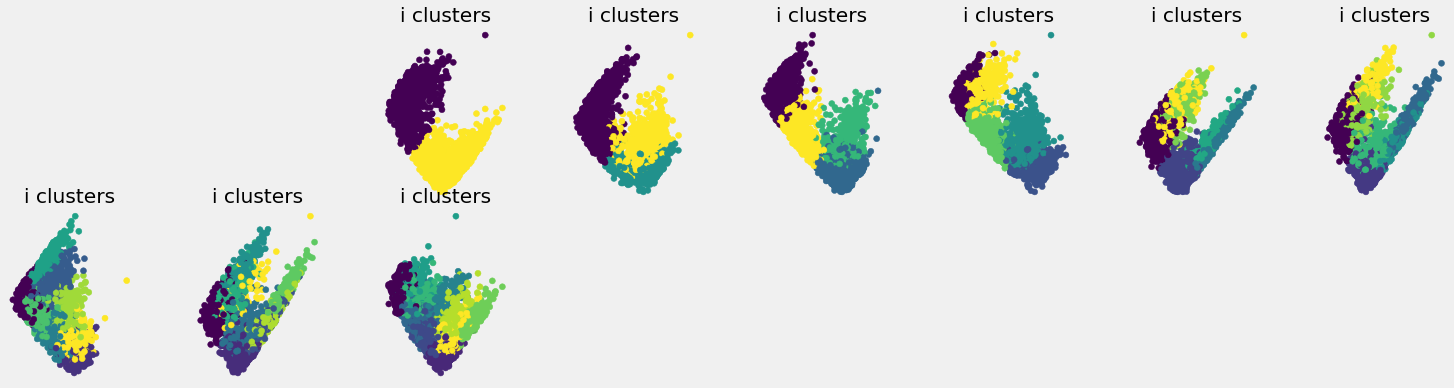

In [47]:
# We need to create a figure that contains different value of `k` as sub-figures
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.5)

#### complete your code below
#### create an empty dictionary `s_score_dict` that we will use to store silhouette scores
#### for different `k` values; use different `k` values as keys, and corresponding
#### silhouette score as values
s_score_dict = {}

#### now we create a for-loop go through a range of `k` values in [2, 11]
for i in range(2,11):
    #### add a sub-figure `ax` to `fig` using `.add_subplot(8,8,i+1,xticks=[],yticks=[])`
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    # conduct the k-means clustering using `k = i`
    km = KMeans(n_clusters=i, random_state=2019)
    # any clustering model needs a distance metric, in this case, `distance` is the distance between
    # any pair of data points
    distances = km.fit_transform(data_features)
    # clustering models will generate `labels` - if you want to create the additional feature 
    # as discussed above, you will use `labels` as its values
    labels = km.labels_
    # you will then applied the fitted `km` model to `data_features`
    l= km.fit_predict(data_features)
    # Silhouette score is computed between `data_features` and `l`
    s_s= metrics.silhouette_score(data_features, l)
    #### update the `s_score_dict` using `i` as key and `s_s` as value
    keys = i
    values = s_s
    s_score_dict[i] = [s_s]
    
    # we will plot the clusters out using scatter plot
    plt.scatter(distances[:,0], distances[:,1], c=labels)
    #### add 'i clusters' as the title of each sub-figure
    ax.set_title("i clusters")
    
#### show plot
plt.show()

Visually, we know that 2-clusters looks the best. Let's double check the silhouette score to make sure.

In [48]:
s_score_dict

{2: [0.39070077846349777],
 3: [0.33807657841298644],
 4: [0.25246316355167037],
 5: [0.23567043282877528],
 6: [0.21405292953734187],
 7: [0.19565511536920396],
 8: [0.18685926623620358],
 9: [0.175558461167512],
 10: [0.17146577351188047]}

As observed in the figure, 2-cluster model returns the highest silhouette score. 

__Rule of thumb__: However, we normally start searching for `k` value at `3`.

So we are going to build a k-means model of `k=3`, and then add the `cluster_label` as a feature.

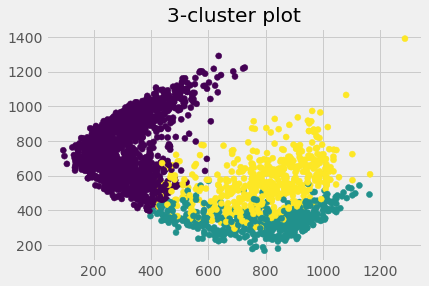

In [49]:
#### complete your code below
#### create a model called `kmeans_model` with `n_clusters = 3` and `random_state = 2019`
kmeans_model = KMeans(n_clusters=3, random_state=2019)

#### capture `distances` by fit (`fit_transform`) `kmeans_model` to `data_features`
distances = kmeans_model.fit_transform(data_features)

#### record labels of clusters in `labels`
labels = kmeans_model.labels_

#### create a scatter plot (plt.scatter()) to plot the clusters
plt.scatter(distances[:,0], distances[:,1], c=labels)

#### add title to plot as `3-cluster plot`
plt.title("3-cluster plot")

#### show the plot
plt.show()

Looks pretty good, correct? Now let's add the `labels` to `data_features` as an additional feature so that we can use it in further analysis.

In [50]:
# look at `labels`
print(labels)
print(len(labels))
print(data_features.shape[0])

[0 0 0 ... 0 0 0]
2265
2265


In [51]:
#### complete your code below
#### add `labels` to `data_features`
#### add `labels` as a column in `data_features` namely `label`
data_features['labels'] = labels

#### double check by looking at the first 5 rows of `data_features`
data_features.head(5)

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,rpg,labels
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,1,0,0,0,0,0,4.592593,4.839506,4.525175,0
1,162,718,5499,1377,232,35,137,602,917.0,46,...,1,0,0,0,0,0,4.432099,4.358025,4.460518,0
2,161,597,5506,1378,208,38,95,448,916.0,43,...,1,0,0,0,0,0,3.708075,4.099379,3.946881,0
3,162,544,5362,1297,186,27,102,472,920.0,49,...,1,0,0,0,0,0,3.358025,3.401235,4.035670,0
4,162,527,5354,1279,200,36,92,443,973.0,107,...,1,0,0,0,0,0,3.253086,3.512346,3.988293,0


### Linear Regression

We will train linear regression models to predict a continuous target `wins`.

In [52]:
#### complete your code below
#### first we need to create the dataset we will use for the regression model
#### `reg_data` = `data_features` + `wins`
reg_data = pd.concat([data_features, wins], axis=1)

#### double check by looking at the first 5 rows of `reg_data`
reg_data.head(5)

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,rpg,labels,wins
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,0,0,0,0,0,4.592593,4.839506,4.525175,0,70
1,162,718,5499,1377,232,35,137,602,917.0,46,...,0,0,0,0,0,4.432099,4.358025,4.460518,0,86
2,161,597,5506,1378,208,38,95,448,916.0,43,...,0,0,0,0,0,3.708075,4.099379,3.946881,0,70
3,162,544,5362,1297,186,27,102,472,920.0,49,...,0,0,0,0,0,3.358025,3.401235,4.035670,0,82
4,162,527,5354,1279,200,36,92,443,973.0,107,...,0,0,0,0,0,3.253086,3.512346,3.988293,0,75


In [53]:
#### complete your code below
#### investigate descriptive stats using describe()
reg_data.describe()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,rpg,labels,wins
count,2265.000000,2265.00000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,...,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000
mean,159.010155,699.28521,5415.782340,1414.788962,245.046799,44.397792,118.361148,513.631788,834.424724,98.186755,...,0.108609,0.103311,0.098013,0.132450,0.092715,4.398085,4.397847,4.398195,0.660927,79.211479
std,3.741585,102.29043,171.911625,106.173052,45.564428,19.605096,55.661793,83.964601,248.585233,50.999021,...,0.311217,0.304432,0.297398,0.339055,0.290097,0.641416,0.651584,0.409479,0.837397,13.020365
min,150.000000,371.00000,4768.000000,1044.000000,110.000000,6.000000,3.000000,282.000000,308.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.409091,2.458065,3.385450,0.000000,36.000000
25%,155.000000,633.00000,5301.000000,1348.000000,213.000000,30.000000,80.000000,457.000000,617.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.975155,3.956790,4.132241,0.000000,70.000000
50%,162.000000,696.00000,5458.000000,1412.000000,246.000000,39.000000,123.000000,511.000000,855.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.382716,4.358025,4.383279,0.000000,80.000000
75%,162.000000,762.00000,5539.000000,1487.000000,278.000000,55.000000,159.000000,568.000000,1015.000000,126.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.783951,4.797546,4.727984,1.000000,89.000000
max,165.000000,1067.00000,5781.000000,1783.000000,376.000000,129.000000,264.000000,835.000000,1543.000000,347.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.896104,7.685897,5.549028,2.000000,116.000000


- This shows the total amount of values in each column with count
- Minimum value and maximum value is shown under min and max

Let's import the dependencies for building and evaluation a linear regression model.

In [54]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error, mean_squared_error

Then let's define the features and target. There are two ways of doing this. Let's try the first.

In [55]:
reg_data.columns.values

array(['G', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'decade_1910', 'decade_1920',
       'decade_1930', 'decade_1940', 'decade_1950', 'decade_1960',
       'decade_1970', 'decade_1980', 'decade_1990', 'decade_2000',
       'decade_2010', 'R_per_game', 'RA_per_game', 'rpg', 'labels',
       'wins'], dtype=object)

In [56]:
#### complete your code below
#### create a variable `reg_values` which are the values in `reg_data`
reg_values = reg_data.values

#### create a variable `X` which contains all columns in `reg_values` besides the last 
feature_columns = ['G', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'decade_1910', 'decade_1920',
       'decade_1930', 'decade_1940', 'decade_1950', 'decade_1960',
       'decade_1970', 'decade_1980', 'decade_1990', 'decade_2000',
       'decade_2010', 'R_per_game', 'RA_per_game', 'rpg', 'labels']
X = reg_data[feature_columns]

#### create a variable `y` which contains the last column in `reg_values`
y = reg_data.wins

Here is an alternative method:

In [57]:
#### complete your code below
#### create a variable `Xa` which contains all values in `data_features`
Xa = data_features

#### create a variable `ya` which contains values in `wins`
ya = wins

Now we need to split our data into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`).

In [58]:
#### complete your code below
#### import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

#### split X, y into training and testing, using 75/25 split, and set `random_state = 2019`
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2019)

In [59]:
# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [60]:
# calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Print `mae`
print(mae)

2.7777943639520646


In [61]:
# Calculate the RMSE

#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

3.5192607319227167


You can print your linear regression model.

In [62]:
lr.coef_

array([-4.24923037e-01,  6.42917341e-02, -3.31743667e-02,  2.46620151e-02,
        4.15018824e-03,  9.12234921e-04,  2.39583481e-03, -6.10408166e-03,
        8.37701935e-05, -3.65192880e-03,  5.63943549e-02, -9.84086096e-02,
        1.54390386e+01,  1.08217736e-01,  1.62138861e-01,  3.04381229e-01,
        6.20197942e-02, -7.05135714e-03, -8.26967339e-03, -7.52511824e-03,
        1.17510773e-03, -4.47302968e-02,  4.72888800e-03, -2.13601470e+02,
       -2.58285814e+00, -1.20247780e+00,  1.53134213e+00,  2.78329886e+00,
        1.03125983e+00,  3.93014347e-01,  2.88132590e-01, -2.31007166e-01,
       -8.33475103e-01, -1.87020195e-01,  4.70381191e-01,  4.02186412e+00,
       -1.83481948e+01,  8.47689426e-01, -5.60109351e-02])

In [63]:
lr.intercept_

218.01314225063277

We can try to train an advanced regression model to see if there is any improvement in results.

In [64]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(X_train, y_train)
predictions_rrm = rrm.predict(X_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.8079619115094956


In [65]:
# Calculate the RMSE
rmse_rrm = sqrt(mean_squared_error(y_test, predictions_rrm))
rmse_rrm 

3.5583553498244105

We can also see how much contribution the `label` feature provides to the regression model.

In [66]:
X.columns.values

array(['G', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'decade_1910', 'decade_1920',
       'decade_1930', 'decade_1940', 'decade_1950', 'decade_1960',
       'decade_1970', 'decade_1980', 'decade_1990', 'decade_2000',
       'decade_2010', 'R_per_game', 'RA_per_game', 'rpg', 'labels'],
      dtype=object)

In [67]:
#### Complete your code below
#### create a variable `Xb` without `label`
#### you can do it by getting X[:,:-1]
Xb = X[['G', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'decade_1910', 'decade_1920',
       'decade_1930', 'decade_1940', 'decade_1950', 'decade_1960',
       'decade_1970', 'decade_1980', 'decade_1990', 'decade_2000',
       'decade_2010', 'R_per_game', 'RA_per_game', 'rpg']]

#### create your training and testing data using Xb and y
#### remember that Xb does not contain 'label', use the same parameters as before
#### 75/25 split, and `random_state = 2019`
X_train,X_test,y_train,y_test = train_test_split(Xb,y,test_size=0.25,random_state=2019)

#### Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### calculate the MAE
# calculate the MAE
mae_nolabel = mean_absolute_error(y_test, y_pred)

#### Print `mae`
print(mae_nolabel)

### Calculate and print RMSE
rmse_nolabel = sqrt(mean_squared_error(y_test, y_pred))
print(rmse_nolabel)

2.7779226910567063
3.5196433911308564


In your analysis, MAE or RMSE are both at the same scale as your target (`y`) variable. Even though we can use the values of MAE/RMSE to compare models; when we need to report/interpret how good our model(s) is, we need to convert it to a ratio (_error ratio_, ER):

$$ ER(y,\hat{y}) = \frac{metric}{y_{range}} $$

in which, $ metric $ is the metric you want to use (e.g., MAE/RMSE), and $y_{range} = y_{max} - y_{min}$.

In [68]:
y.describe()

count    2265.000000
mean       79.211479
std        13.020365
min        36.000000
25%        70.000000
50%        80.000000
75%        89.000000
max       116.000000
Name: wins, dtype: float64

In [69]:
# calculate the `mae_ratio` and `rmse_ratio` below
# write your code below

mae_ratio = (mae)/(y.max()-y.min())
print(mae_ratio)

rmse_ratio = (rmse)/(y.max()-y.min())
print(rmse_ratio)

0.03472242954940081
0.043990759149033956


### Question: 
__Do you observe an improvement or not while excluding `label` in the analysis? In other words, does `label` help with the analysis? Answer in the next block__.

| *Model* | *MAE* | *RMSE* |
| :---  | :----: | :---: |
| **Including Label** | 2.7777943639520646 | 3.5192607319227167 |
| **Excluding Label** | 2.7779226910567063 | 3.5196433911308564 |
| *Difference* | *-0.00012832710464172337* | *-0.0003826592081397351* |

The lower the RMSE and MAE the better and when label is excluded from the analysis, there is a decrease in both the MAE and RMSE scores. When removing label, MAE increased by 0.00012832710464172337 and RMSE increased by 0.0003826592081397351. Though this is not a huge amount, the increase proves that label does have an impact and does help the analysis. 

## Logistic Regression

You will need to create a logistic regression model __on your own__, using `data_features` as features, and `win_bins` as the target.

If you have any question, refer to the logistic regression notebook for more help.

__Hint:__ You should consider using `sklearn`'s classification report to evaluation your results - since this is a classification problem. The docs can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [70]:
# Copy data_features into a new name to differentiate from the previous models created
data_features2 = data_features

# concat the 2 dataframes into 1 dataframe
data = pd.concat([data_features2, win_bins], axis=1)

# check to make sure it worked
data.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,rpg,labels,win_bins
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,0,0,0,0,0,4.592593,4.839506,4.525175,0,3
1,162,718,5499,1377,232,35,137,602,917.0,46,...,0,0,0,0,0,4.432099,4.358025,4.460518,0,3
2,161,597,5506,1378,208,38,95,448,916.0,43,...,0,0,0,0,0,3.708075,4.099379,3.946881,0,3
3,162,544,5362,1297,186,27,102,472,920.0,49,...,0,0,0,0,0,3.358025,3.401235,4.035670,0,3
4,162,527,5354,1279,200,36,92,443,973.0,107,...,0,0,0,0,0,3.253086,3.512346,3.988293,0,3


| Win Bin | Description | 
| :---:  | ---- | 
| 1 | Wins amounting less than 50 | 
| 2 | Wins amounting less than 70 and greater than 50 | 
| 3 | Wins amounting less than 90 and greater than 70 | 
| 4 | Wins amounting less than 110 and greater than 90 |
| 5 | Wins amounting greater than 110 |

### Select Features
Divide the given columns into two types of variables:  
1. Dependent variables (target variable) --> data_features2
2. Independent variables (feature variables) --> win_bins


In [71]:
X = data_features # Features
y = win_bins # Target variable

### Split Data
Divide the dataset into a training set and a test set to understand model performance.
- It will be broken down into a 75:25 ratio, meaning 75% of the data will be used for model training and 25% for model testing.

In [72]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2019)

### Model Development and Prediction

By using the LogisticRegression() function, create a Logistic Regression classifier object

Then, fit the model on the train set and perform prediction on the test set.

In [73]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with train set data
logreg.fit(X_train,y_train)

# perform prediction on the test
y_pred=logreg.predict(X_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Evaluate the Model by Using a Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [74]:
# import metrics class
from sklearn import metrics
labels = [1,2,3,4,5]
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels= labels)
confusion_matrix

array([[  1,   1,   0,   0,   0],
       [  1, 100,  22,   0,   0],
       [  0,  25, 260,  19,   0],
       [  0,   0,  41,  96,   0],
       [  0,   0,   0,   1,   0]])

**Analyzation of the Confusion Matrix:**
- Diagonal values represent accurate predictions & non-diagonal values represent inaccurate predictions.
    - Results: 1, 100, 260, 96, & 0 are accurate predictions, and the surrounding number are inaccurate predictions.


### Visualize the Confusion Matrix using a Heatmap
In the previous code, the confusion matrix is shown in the form of an array object.

Here, the confusion matrix is visualized through a heatmap using matplotlib and seaborn.


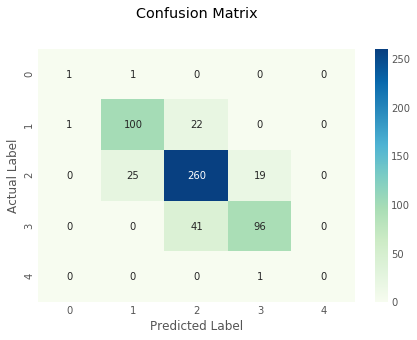

In [76]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

class_names=[1,2,3,4,5] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="GnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Classification Report:**

In [78]:
from sklearn.metrics import classification_report
target_names = ['1', '2', '3', '4','5']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.79      0.81      0.80       123
           3       0.80      0.86      0.83       304
           4       0.83      0.70      0.76       137
           5       0.00      0.00      0.00         1

    accuracy                           0.81       567
   macro avg       0.59      0.57      0.58       567
weighted avg       0.81      0.81      0.80       567



- The classification report shows the highest f1-score in target 3 along with the highest recall.
    - Closer to 1 the better